# Marketing Analytics
### Visualizing customer engagement measured by various factors using IBM Watson Marketing Customer Value Data


## Setup

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
import statsmodels.formula.api as sm
sns.set()

## Read and Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Exploratory Data Analysis:
Before we dive into regression analysis, we will first take a more detailed look at the data, in order to have a better understanding of what data points we have and what patterns we can see in the data. We notice that the column Response contains information on whether a customer responded to marketing calls. We will use this field as a measure of customer engagement. For future computations, it will be better to encode this field with numerical values

In [5]:
df['Engaged'] = df.Response.apply(lambda x: 0 if x =='No' else 1)

In [6]:
df.shape

(9134, 25)

In [7]:
print(df.columns)
print()
print(df.dtypes)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Engaged'],
      dtype='object')

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                  

In [8]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'Engaged'],
      dtype='object')

In [9]:
df.dtypes.groupby(df.dtypes.values).count()

int64       7
float64     2
object     16
dtype: int64

## Response Rate Visualization
### Response rate: The first thing that we are going to look at is the aggregate response rate. This response rate is simply the percentage of customers that responded to the marketing calls.

In [27]:
response_rate_df = df.groupby('Engaged').count()['Response']/df.shape[0] * 100
response_rate_df= pd.DataFrame(response_rate_df)
response_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [16]:
#Response= df.Response.value_counts()

In [24]:
#Response.plot(kind="bar",figsize=(10,7), title="Marketing Response",grid=True);

In [25]:
#Rperc=(df.Response.value_counts()/df.shape[0])*100
#Rperc
#Rperc.plot(kind="bar",figsize=(10,7), title="Marketing Response",grid=True);
#plt.xlabel("Response")
#plt.ylabel("Percentage")

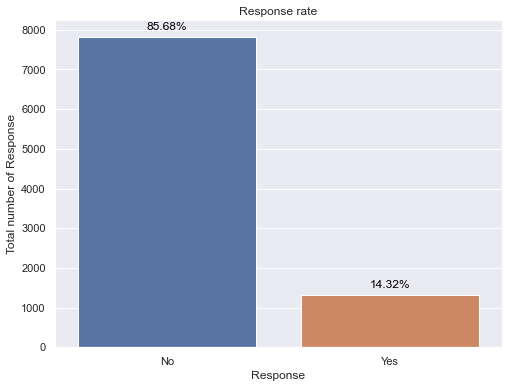

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Response',data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate')
annot_plot(ax,1,1)
plt.show()

### For the engagement rate, about 14% customers have responded to marketing calls, and the remaining 86% of the customers have not responded.

## Sales Channels Response Rate

### Now, let's see whether we can find any noticeable patterns in the sales channel and engagement. We are going to analyze how the engaged and non-engaged customers are distributed among different sales channels

In [47]:
sales_channel_df = pd.pivot_table(df, values='Response', index='Sales_Channel', columns='Engaged', aggfunc=len).fillna(0.0)
sales_channel_df.columns = ['Not_Responded', 'Responded']
sales_channel_df


,Not_Responded,Responded
Sales_Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


As you have noticed in the previous section, there are significantly more customers that are not engaged with the marketing efforts, so it is quite difficult to look at the differences in the sales channel distributions between the engaged and non-engaged customers from raw numbers. To make the differences more visually identifiable, we can build pie charts

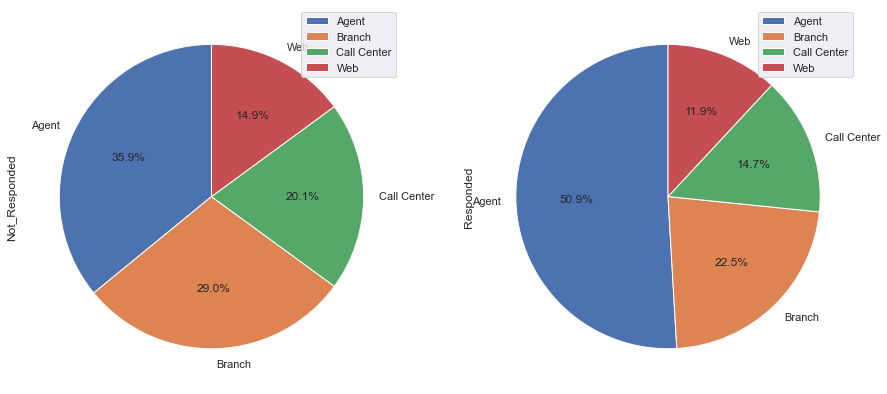

In [48]:
sales_channel_df.plot(kind='pie', figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x)

plt.show()


## Response rate across States

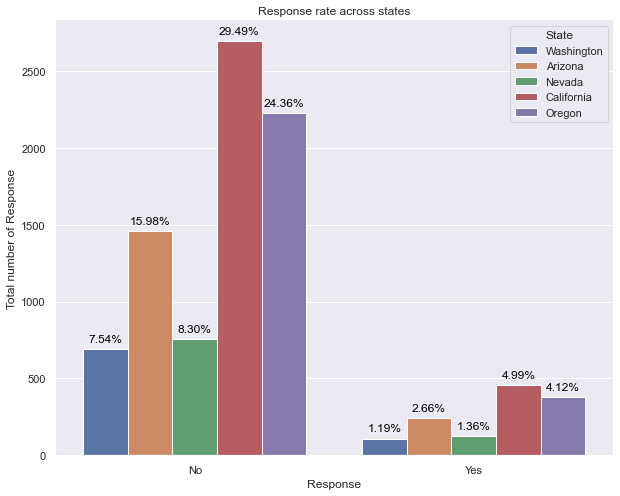

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Response',hue='State',data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate across states')
annot_plot(ax,1,1)
plt.show()

### We see the response rate across the sample states on above chart.

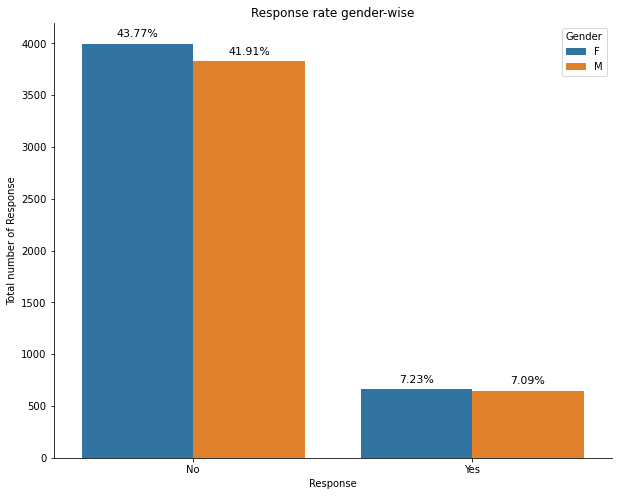

In [127]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Response',hue='Gender',data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate gender-wise')
annot_plot(ax,1,1)
plt.show()

### We see that, ratio of male and female for responding to a marketing call is almost same.

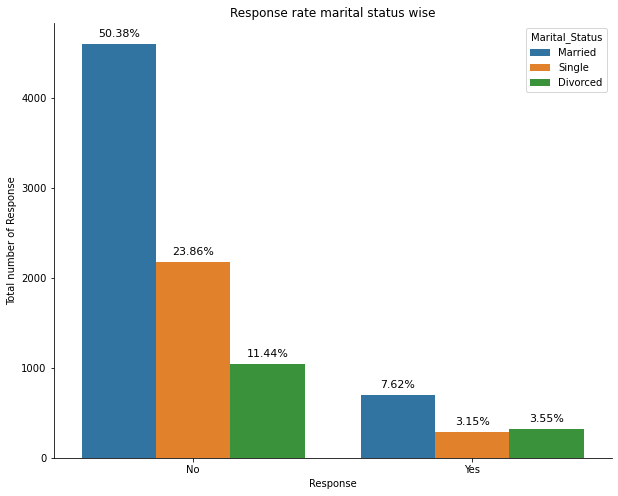

In [128]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Response',hue='Marital_Status',data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate marital status wise')
annot_plot(ax,1,1)
plt.show()

### Out of 14% customers, 8% customers those who rsponded to marketing calls are from married category.

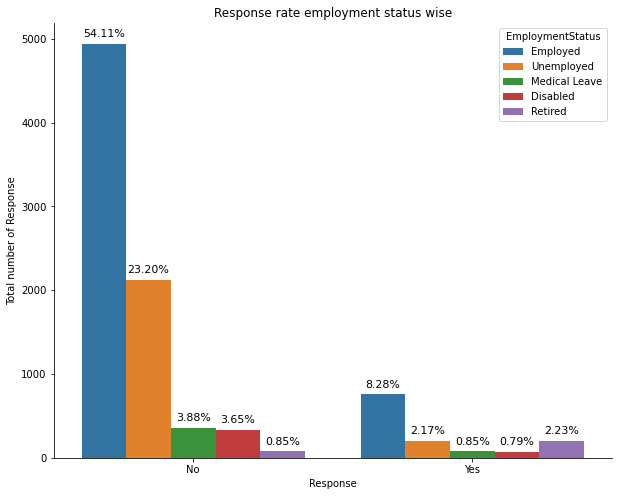

In [129]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Response',hue='EmploymentStatus',data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate employment status wise')
annot_plot(ax,1,1)
plt.show()

### Out of the 86% customer who didnt respond,about 54% were employed

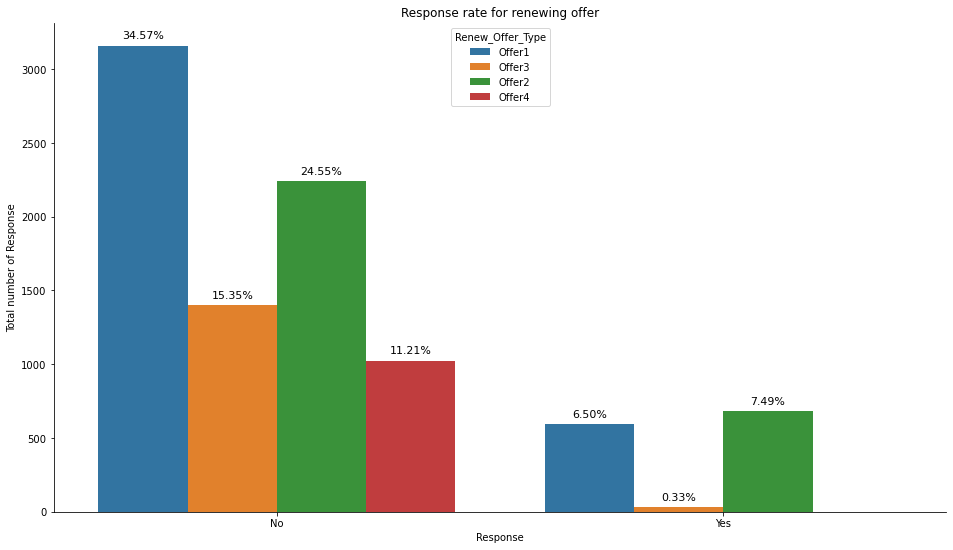

In [136]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x='Response',hue = 'Renew_Offer_Type' ,data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate for renewing offer')
annot_plot(ax, 1,1)
plt.show()

### For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

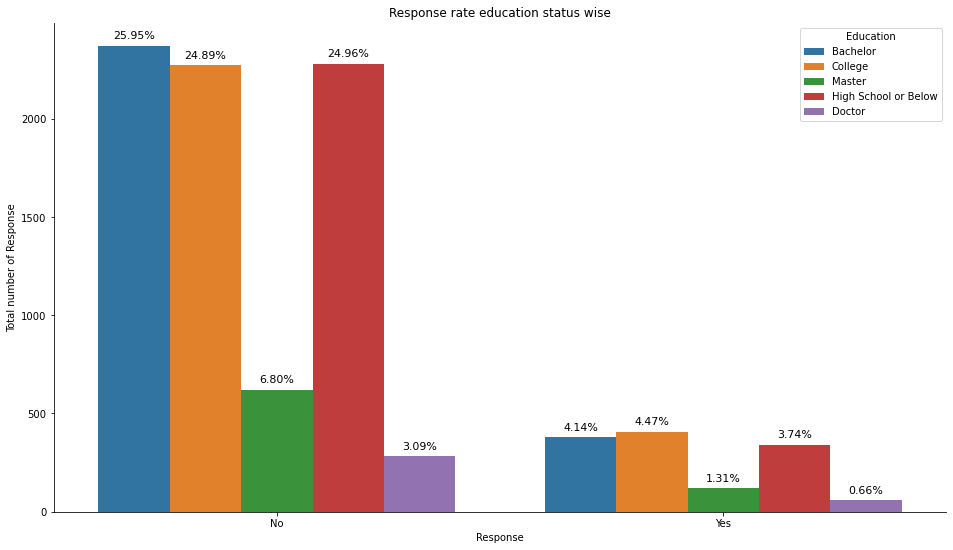

In [144]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x='Response',hue = 'Education' ,data = df)
plt.ylabel('Total number of Response')
plt.title('Response rate education status wise')
annot_plot(ax, 1,1)
plt.show()

### The customers with Doctor and master degree are very less who responded to marketing calls, may be they are not intersted or busy. or we can say young people are most likely to respond to marketing calls.

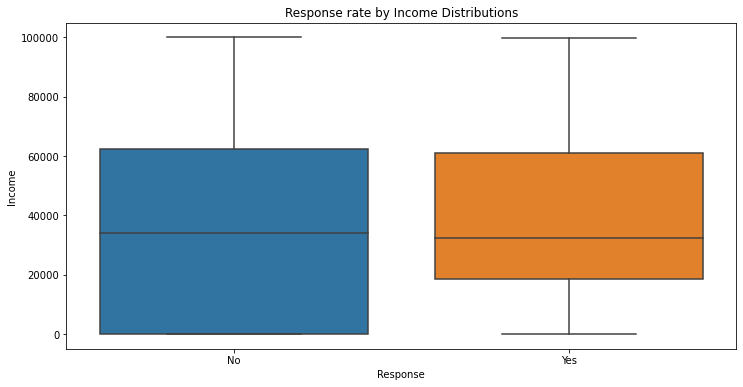

In [145]:
plt.figure(figsize=(12,6))
plt.title('Response rate by Income Distributions')
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.show()

Box plots are a great way to visualize the distribuation of countinous variables. They show the min, max, first quatile, meadian and third quartile, all in one view. The central rectangle spans from the first quartile to the third quartile, and the green line shows the median. The lower and upper ends show the minimum and the maximum of each distribution.

The dots above the upper boundry line show the suspected outliers that are decided based on the INterquartile range (IQR). The points that fall 1.5*IQR above the third quartile or 1.5*IQR below the quartile are suspected outliers and are drawn with the dots.

## Total claim amounts

### The last thing that we are going to look at are the differences in the distributions of Total Claim Amount between the engaged and non-engaged groups. We are going to visualize this by using box plots.

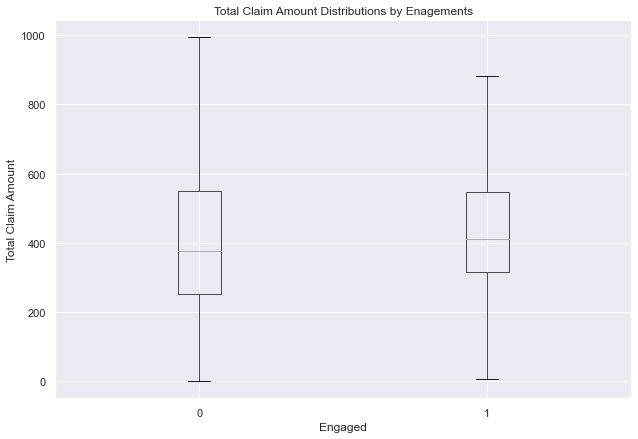

In [50]:
ax = df[['Engaged', 'Total_Claim_Amount']].boxplot(by='Engaged', showfliers=False, figsize=(10,7))

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

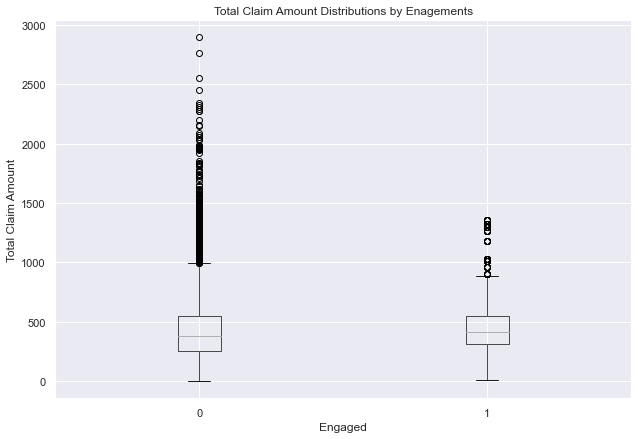

In [51]:
ax = df[['Engaged', 'Total_Claim_Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(10,7)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

## We have analyzed the types of fields that we have in the data and how the patterns differ between the engaged group and the non-engaged group. 